<a href="https://colab.research.google.com/github/dhanushkaputty/ML/blob/main/MLWeek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/diabetes_DT.csv')

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, pd.NA)



In [7]:
df.fillna(df.mean(), inplace=True)


/tmp/ipython-input-1920348818.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']



In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)

dtree.fit(X_train,y_train)
y_pred_dt = dtree.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.7186147186147186

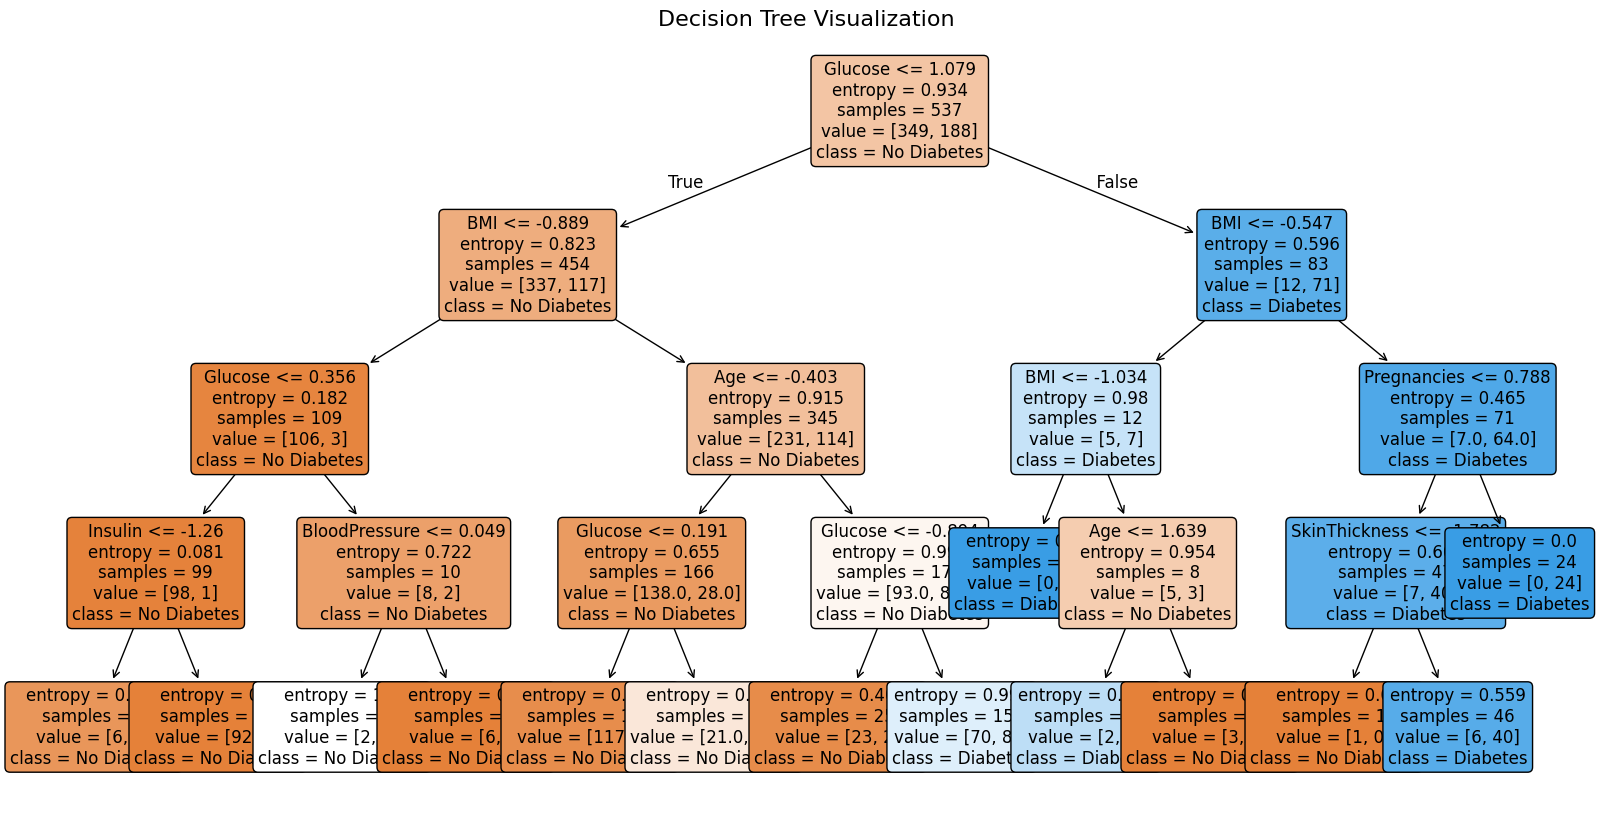

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    dtree,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)



0.7056277056277056

In [21]:
results = pd.DataFrame({'Actual values':y_test.values,'predicted values':y_pred_knn})
print(results.head(20))

    Actual values  predicted values
0               0                 1
1               0                 0
2               0                 0
3               0                 1
4               0                 1
5               0                 1
6               0                 0
7               0                 0
8               0                 1
9               0                 0
10              1                 0
11              0                 1
12              1                 0
13              0                 0
14              0                 0
15              1                 0
16              0                 0
17              0                 0
18              1                 1
19              1                 1


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svm_model = SVC(kernel = 'linear', C =1.0,random_state = 42)
svm_model.fit(X_train,y_train)
y_pred_svm = svm_model.predict(X_test)
print(accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

0.7359307359307359
[[123  28]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



In [32]:
from sklearn.naive_bayes import GaussianNB
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)






In [34]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

0.7402597402597403
[[119  32]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [35]:
results = pd.DataFrame({'Actual values':y_test.values,'predicted values':y_pred_nb})
print(results.head(20))

    Actual values  predicted values
0               0                 0
1               0                 0
2               0                 0
3               0                 0
4               0                 1
5               0                 0
6               0                 0
7               0                 0
8               0                 0
9               0                 1
10              1                 0
11              0                 1
12              1                 1
13              0                 0
14              0                 0
15              1                 0
16              0                 0
17              0                 0
18              1                 1
19              1                 0


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=4),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', C=1.0),
    'Naive Bayes': GaussianNB()
}



In [38]:
results = []

for name, model in models.items():
    if name in ['KNN', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(report['1']['precision'], 4),
        'Recall': round(report['1']['recall'], 4),
        'F1-Score': round(report['1']['f1-score'], 4)
    })


In [40]:
comparison_tb = pd.DataFrame(results)
print(comparison_tb)

           Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree    0.7186     0.5688  0.7750    0.6561
1            KNN    0.7100     0.5684  0.6750    0.6171
2            SVM    0.7359     0.6267  0.5875    0.6065
3    Naive Bayes    0.7403     0.6190  0.6500    0.6341
